# Άσκηση 3, Φιλτράρισμα:
Θεωρήστε τις εικόνες αποχρώσεων του γκρι ‘girlface.jpg’, ‘fruits.jpg’ και ‘leaf.jpg’.

**Ζητούμενα:**

Α. Για την εικόνα ‘girlface.jpg’ σχεδιάστε και εφαρμόστε ένα φίλτρο για τον εντοπισμό των κύριων στοιχείων/αντικειμένων της εικόνας.

Β. Για την εικόνα ‘fruits.jpg’ σχεδιάστε και εφαρμόστε ένα φίλτρο για τον (προσεγγιστικό) εντοπισμό των περιγραμμάτων των αντικειμένων.

Γ. Για την εικόνα ‘leaf.jpg’ σχεδιάστε και εφαρμόστε ένα φίλτρο για τον εντοπισμό των λεπτομερειών των αντικειμένων.

Για όλες τις περιπτώσεις φιλτραρίσματος, τυπώστε τη (βέλτιστη) φιλτραρισμένη εικόνα που προκύπτει, σχολιάστε το αποτέλεσμα και εξηγήστε λεπτομερώς τη διαδικασία σχεδίασης του κάθε φίλτρου (π.χ. επιλογή φίλτρου, καθορισμός παραμέτρων, κτλ.).

---

In [1]:
%pip install numpy matplotlib scikit-image opencv-python scipy --quiet

Note: you may need to restart the kernel to use updated packages.


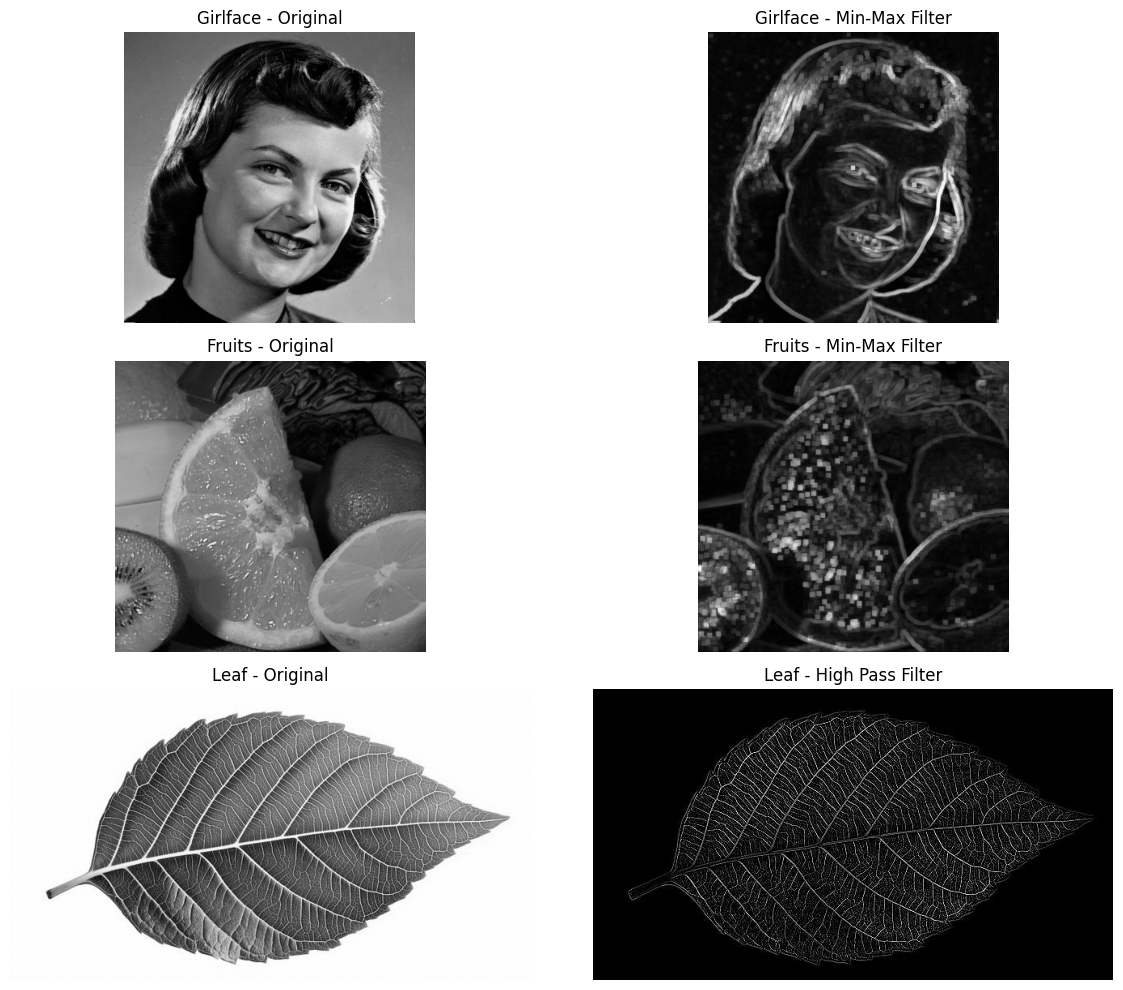

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2
import scipy.ndimage as ndi

girlface = ski.io.imread('https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-1/instructions/images-project-1/girlface.jpg?raw=true')
fruits = ski.io.imread('https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-1/instructions/images-project-1/fruits.jpg?raw=true')
leaf = ski.io.imread('https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-1/instructions/images-project-1/leaf.jpg?raw=true')

# high-pass filter
high_pass_filter = np.array([
    [0, -1,  0],
    [-1,  4, -1],
    [0, -1,  0]
], dtype=np.float32)

# Εφαρμογή Min και Max filter
girlface_min = ndi.minimum_filter(girlface, size=7)
girlface_max = ndi.maximum_filter(girlface, size=7)
girlface_filtered = girlface_max - girlface_min

# Εφαρμογή Min και Max filter
fruits_min = ndi.minimum_filter(fruits, size=7)
fruits_max = ndi.maximum_filter(fruits, size=7)
fruits_filtered = fruits_max - fruits_min

# Εφαρμογή high_pass_filter
leaf_filtered = cv2.filter2D(leaf, -1, high_pass_filter)

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Girlface
axs[0, 0].imshow(girlface, cmap='gray')
axs[0, 0].set_title('Girlface - Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(girlface_filtered, cmap='gray')
axs[0, 1].set_title('Girlface - Min-Max Filter')
axs[0, 1].axis('off')

# Fruits
axs[1, 0].imshow(fruits, cmap='gray')
axs[1, 0].set_title('Fruits - Original')
axs[1, 0].axis('off')

axs[1, 1].imshow(fruits_filtered, cmap='gray')
axs[1, 1].set_title('Fruits - Min-Max Filter')
axs[1, 1].axis('off')

# Leaf
axs[2, 0].imshow(leaf, cmap='gray')
axs[2, 0].set_title('Leaf - Original')
axs[2, 0].axis('off')

axs[2, 1].imshow(leaf_filtered, cmap='gray')
axs[2, 1].set_title('Leaf - High Pass Filter')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


---
# Σχόλια Αποτελέσματος:
Α. Εντοπισμός κύριων στοιχείων/αντικειμένων

Χρησιμοποιήσα φίλτρο: Min - Max

Ο συνδυασμός max - min είναι μη-γραμμικό φίλτρο που εντοπίζει τις μεγάλες διαφορές φωτεινότητας, δηλαδή τα κύρια στοιχεία.
Το αποτέλεσμα τονίζει τα βασικά χαρακτηριστικά του προσώπου (μάτια, στόμα, μαλία).


Β. Εντοπισμός περιγραμμάτων αντικειμένων

Χρησιμοποιήσα φίλτρο: Min - Max

Το max-min φίλτρο ενισχύει τα περιγράμματα των αντικειμένων λόγω της μεγάλης διακύμανσης στις τιμές φωτεινότητας σε περιοχές αλλαγής. Τα περιγράμματα των φρούτων γίνονται ευδιάκριτα.


Γ. Εντοπισμός λεπτομερειών αντικειμένων

Φίλτρο: Υψηπερατό φίλτρο (high-pass filter)

    [ 0, -1,  0]
    [-1,  4, -1]
    [ 0, -1,  0]

Τονίζει τις υψηλές χωρικές συχνότητες, δηλαδή τις λεπτές μεταβολές φωτεινότητας που αντιστοιχούν σε λεπτομέρειες.